In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./data/pretraining-effect.csv')
df

,Name,pretrainingBatchSize,bleu
0,fast-jazz-25,50,0.219146
1,warm-sponge-27,500,0.216172
2,swift-rain-18,100,0.214580
3,avid-star-26,250,0.213094
4,hopeful-oath-28,750,0.209779
5,misty-dawn-29,1000,0.208405
6,rose-forest-24,25,0.205355


In [20]:
arr = df.to_numpy()[:,1:]
arr

array([[50, 0.2191456251548992],
       [500, 0.2161720323758605],
       [100, 0.2145797644288093],
       [250, 0.2130936478672993],
       [750, 0.2097793088744685],
       [1000, 0.2084047032616047],
       [25, 0.2053550250095613]], dtype=object)

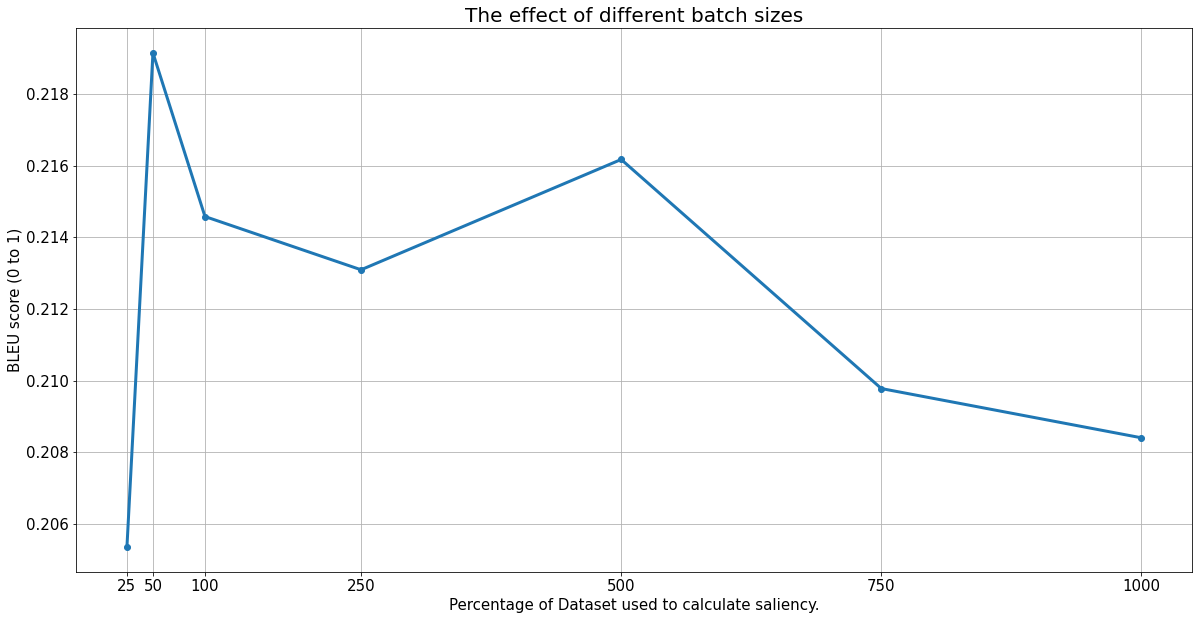

In [21]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# for i,j,m in zip(types,final,markers):
index = np.argsort(arr[:,0])
plt.plot(arr[index,0],arr[index,1],marker='o',linewidth=3)

# plt.legend(prop={'size': 20})
plt.xticks([25,50,100,250,500,750,1000])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of Dataset used to calculate saliency.',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of different batch sizes', fontsize=20)
ax.grid()
plt.savefig('The effect of different batch sizes.png')
plt.show()

In [24]:
df = pd.read_csv('./data/obd-with-retrain.csv')
df

,Name,percentage,pre_bleu,post_bleu
0,soft-lion-10,0.500,0.274511,0.277820
1,clear-disco-8,0.600,0.266813,0.276138
2,expert-serenity-6,0.700,0.249429,0.274117
3,proud-glade-4,0.800,0.218177,0.267775
4,sage-sun-1,0.900,0.156042,0.253656
5,robust-frost-11,0.910,0.142467,0.252971
6,helpful-totem-9,0.930,0.112445,0.243625
7,drawn-microwave-7,0.950,0.056114,0.221748
8,dutiful-fog-5,0.970,0.005079,0.187372
9,effortless-armadillo-2,0.990,0.003600,0.110856


In [31]:
arr = df.to_numpy()[:,1:]
arr

array([[0.5, 0.2745105945632104, 0.2778202099732292],
       [0.6, 0.2668132365325574, 0.2761382321764516],
       [0.7, 0.2494292049422878, 0.2741170149920088],
       [0.8, 0.2181771080438117, 0.2677751526068661],
       [0.9, 0.1560417532382744, 0.2536557623961782],
       [0.91, 0.1424669520519882, 0.2529711727736041],
       [0.93, 0.112445029686726, 0.2436245503328861],
       [0.95, 0.0561143900005026, 0.2217475231801159],
       [0.97, 0.0050790167575088, 0.1873721683460481],
       [0.99, 0.0036004411766448, 0.1108564783436172],
       [0.995, 0.0575375048250054, 0.0732717770961164]], dtype=object)

In [45]:
arr[-1,1] = 0
arr[0]

array([0.5, 0.2745105945632104, 0.2778202099732292], dtype=object)

[[0.5 0.2745105945632104 0.2778202099732292]
 [0.6 0.2668132365325574 0.2761382321764516]
 [0.7 0.2494292049422878 0.2741170149920088]
 [0.8 0.2181771080438117 0.2677751526068661]
 [0.9 0.1560417532382744 0.2536557623961782]
 [0.91 0.1424669520519882 0.2529711727736041]
 [0.93 0.112445029686726 0.2436245503328861]
 [0.95 0.0561143900005026 0.2217475231801159]
 [0.97 0.0050790167575088 0.1873721683460481]
 [0.99 0.0036004411766448 0.1108564783436172]
 [0.995 0 0.0732717770961164]]


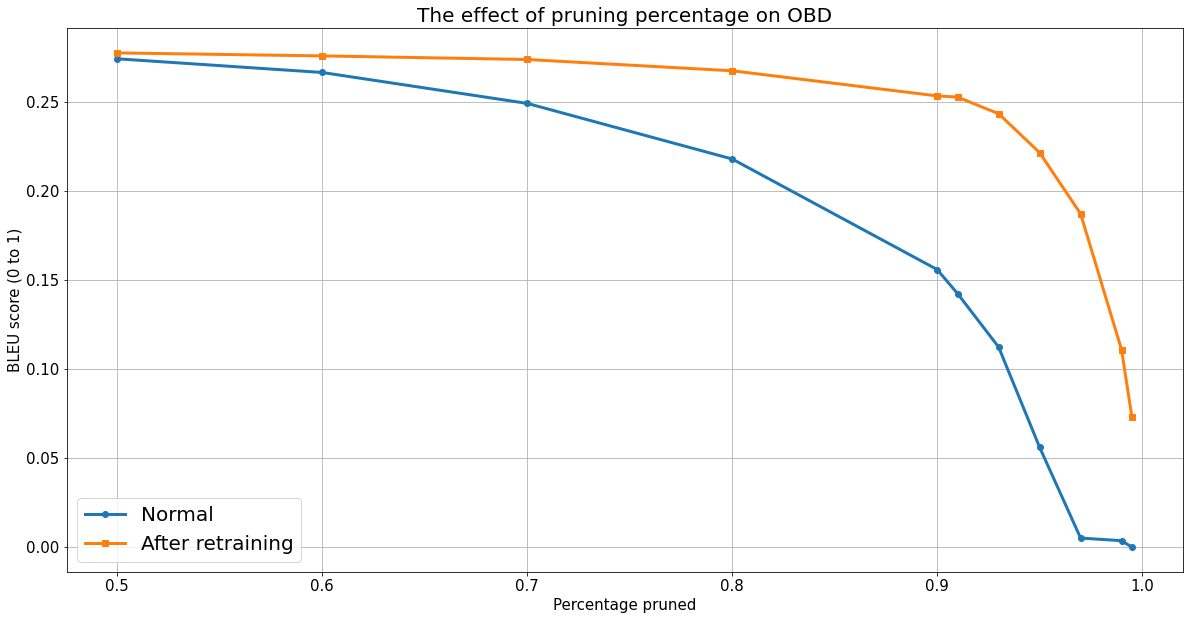

In [75]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# ax.set_xscale('log')
for i,j,name in zip(range(1,3),markers,['Normal','After retraining']):
# index = np.argsort(arr[:,0])
    plt.plot((arr[:,0].astype('float')),arr[:,i],marker=j,label=name,linewidth=3)
print(arr)
plt.legend(prop={'size': 20})
# plt.xticks(list(arr[:,0]))


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage pruned',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of pruning percentage on OBD', fontsize=20)
ax.grid()
plt.savefig('The effect of pruning percentage on OBD.png')
plt.show()

In [76]:
new_arr = arr[4:,:]

[[0.5 0.2745105945632104 0.2778202099732292]
 [0.6 0.2668132365325574 0.2761382321764516]
 [0.7 0.2494292049422878 0.2741170149920088]
 [0.8 0.2181771080438117 0.2677751526068661]
 [0.9 0.1560417532382744 0.2536557623961782]
 [0.91 0.1424669520519882 0.2529711727736041]
 [0.93 0.112445029686726 0.2436245503328861]
 [0.95 0.0561143900005026 0.2217475231801159]
 [0.97 0.0050790167575088 0.1873721683460481]
 [0.99 0.0036004411766448 0.1108564783436172]
 [0.995 0 0.0732717770961164]]


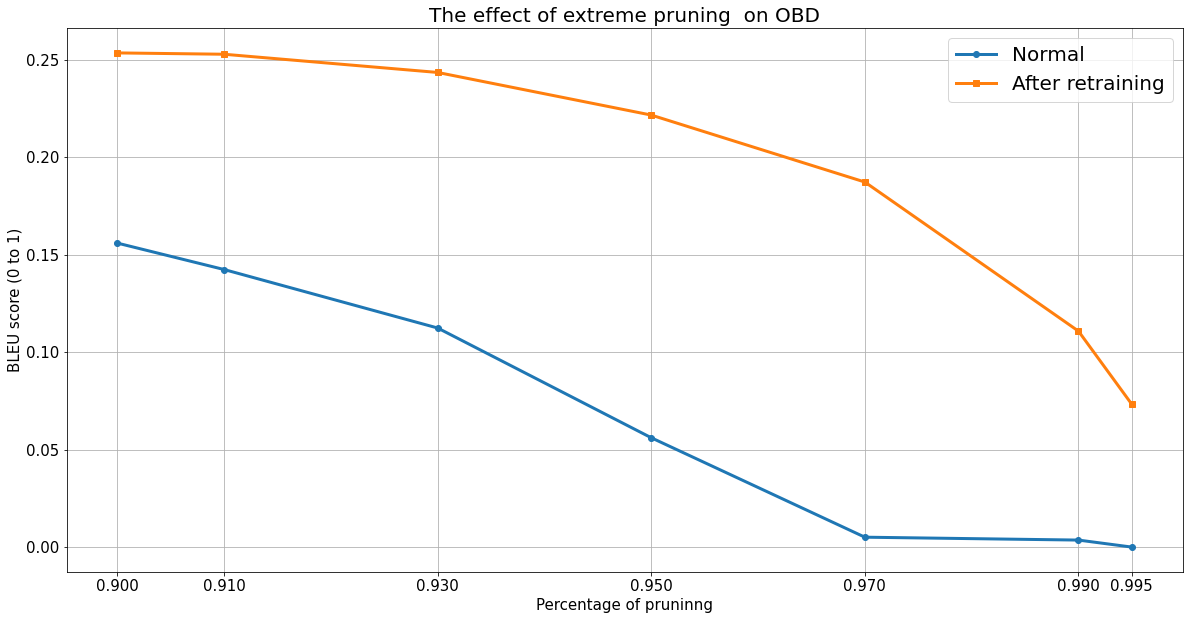

In [77]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# ax.set_xscale('log')
for i,j,name in zip(range(1,3),markers,['Normal','After retraining']):
    # index = np.argsort(arr[:,0])
    plt.plot((new_arr[:,0].astype('float')),new_arr[:,i],marker=j,label=name,linewidth=3)
print(arr)
plt.legend(prop={'size': 20})
plt.xticks(list(new_arr[:,0]))


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of pruninng',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of extreme pruning  on OBD', fontsize=20)
ax.grid()
plt.savefig('The effect of extreme pruning  on OBD.png')
plt.show()

## Percentage pruned (bar)

In [78]:
df = pd.read_csv('./data/percent-pruned.csv')
df

,Name,classN,percentage,pruning_type,percentage-pruned
0,happy-dew-120,att_vec_linear,[0.8],class-blind,76.229858
1,eternal-snowball-119,att_src_linear,[0.8],class-blind,85.766602
2,whole-frog-118,pred,[0.8],class-blind,82.615853
3,rare-surf-117,decoder_lstm,[0.8],class-blind,75.070389
4,treasured-totem-116,decoder_cell_init,[0.8],class-blind,77.830318
...,...,...,...,...,...
99,soft-bush-7,decoder_lstm,90,NaN,52.499366
100,valiant-energy-6,decoder_cell_init,90,NaN,38.411458
101,vocal-pine-5,encoder_lstm,90,NaN,51.689510
102,earnest-resonance-4,tgt_embed,90,NaN,97.206990


In [105]:
arr = df.to_numpy()[:,1:]
new_arr = arr[arr[:,1] != '90',:]
for i in range(new_arr.shape[0]):
    name = new_arr[i,1][0] 
    if name == '[':
        new_arr[i,1] = float(new_arr[i,1][1:-1])
    else:
        new_arr[i,1] = float(new_arr[i,1])

for i in range(new_arr.shape[0]):
    name = new_arr[i,2]
    if type(name) !=  str:
        new_arr[i,2] = 'snip'


In [106]:
new_arr

array([['att_vec_linear', 0.8, 'class-blind', 76.2298583984375],
       ['att_src_linear', 0.8, 'class-blind', 85.7666015625],
       ['pred', 0.8, 'class-blind', 82.61585255651946],
       ['decoder_lstm', 0.8, 'class-blind', 75.07038859577922],
       ['decoder_cell_init', 0.8, 'class-blind', 77.83031798245614],
       ['encoder_lstm', 0.8, 'class-blind', 71.77382888497081],
       ['tgt_embed', 0.8, 'class-blind', 80.05156304766912],
       ['src_embed', 0.8, 'class-blind', 79.66211810002811],
       ['att_vec_linear', 0.7, 'class-blind', 66.92911783854166],
       ['att_src_linear', 0.7, 'class-blind', 77.02713012695312],
       ['att_vec_linear', 0.8, 'obd', 8.2977294921875],
       ['pred', 0.7, 'class-blind', 72.95828951980371],
       ['att_src_linear', 0.8, 'obd', 12.99591064453125],
       ['decoder_lstm', 0.7, 'class-blind', 66.3168374594156],
       ['pred', 0.8, 'obd', 83.44510917783911],
       ['decoder_cell_init', 0.7, 'class-blind', 68.14083820662769],
       ['decoder